<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
import requests

In [3]:
# load data
file = 'job_listings.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
# clean version of data

df = pd.read_csv(file, usecols=['title', 'description'])[['title', 'description']]
df.head()

,title,description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...


In [5]:
# cleaner version of data

df['description'] = df['description'].str.replace('b"', '')

In [6]:
df['description'] = df['description'].str.replace("b'", '')

In [7]:
df = df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())

df.head()

,title,description
0,Data scientist,Job Requirements:\nConceptual understanding in...
1,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations\...


In [8]:
# need to remove unicode from df

df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')

In [9]:
df.head()

,title,description
0,Data scientist,Job Requirements: Conceptual understanding in ...
1,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA multiple locations + years o...


In [10]:
# sanity check

df.loc[15, 'description']

'The Atlantic is seeking a Data Scientist to help lead research and analysis initiatives and support ongoing delivery of key insights to drive business growth and overall impact. The role will work closely with partners in Consumer Revenue, Advertising, Editorial, and Product to understand performance, identify and predict opportunities for improvement, and develop plans of action to maximize revenue, audience growth, and editorial engagement. This is a great opportunity to be part of a growing team and help shape the way we develop, deploy, and operate production quality analytics systems and processes   and have an impact on how The Atlantic uses data in the years to come. Responsibilities: Lead research projects from hypothesis formation to delivering findings and recommendations to stakeholders Use supervised and unsupervised machine learning techniques to make predictions and categorize Design, execute, and evaluate tests across the company Guide the development of reports, dashbo

## 2) Use Spacy to tokenize the listings 

In [11]:
##### Your Code Here #####
nlp = spacy.load('en_core_web_lg')
stop_words = nlp.Defaults.stop_words.union(['data', 'science'])

df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) if (token not in stop_words) and (token.is_punct !=True)])

In [13]:
df.sample(10)

,title,description,tokens
97,"Data Scientist, Product",We\'re looking for Data Scientists who are pas...,"[we\'re, look, for, datum, scientist, who, be,..."
185,Sr. Data Scientist,Full-time Position The Senior Data Scientist ...,"[full, time, position, , the, Senior, Data, S..."
52,Senior Data Scientist,The challenge Adobe is looking for a Senior Da...,"[the, challenge, Adobe, be, look, for, a, Seni..."
290,"Intern, Data Scientist Cloud Platform",InternshipOur team at Autodesk in San Francisc...,"[InternshipOur, team, at, Autodesk, in, San, F..."
75,Data Scientist,Title: Data Scientist Job Location : Columbia ...,"[title, Data, Scientist, Job, location, Columb..."
305,Data Scientist,There s a lot of work around Osmo for someon...,"[there, , s, a, lot, of, work, around, Osmo,..."
8,Sr. Data Scientist,MS in a quantitative discipline such as Statis...,"[MS, in, a, quantitative, discipline, such, as..."
98,"Data Scientist - Machine Learning, AdTech","At Uber, we ignite opportunity by setting the ...","[at, Uber, -PRON-, ignite, opportunity, by, se..."
356,Data Science Intern,InternshipOverview: Are you a geek for data? D...,"[InternshipOverview, be, -PRON-, a, geek, for,..."
423,Data Scientist - Insurance,"$200,000 - $350,000 a yearA million people a y...","[$, 200,000, $, 350,000, a, yearA, million, pe..."


In [14]:
df.head()

,title,description,tokens
0,Data scientist,Job Requirements: Conceptual understanding in ...,"[job, requirement, conceptual, understanding, ..."
1,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[job, description, , as, a, Data, scientist, ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[as, a, Data, scientist, -PRON-, will, be, wor..."
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$, 4,969, $, 6,756, a, monthcontractunder, th..."
4,Data Scientist,Location: USA multiple locations + years o...,"[location, USA, , multiple, location, +, y..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
##### Your Code Here #####

count_vect = CountVectorizer()

dtm = count_vect.fit_transform(df['description'])
dtm_df = pd.DataFrame(dtm.todense(), columns=count_vect.get_feature_names())
dtm_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

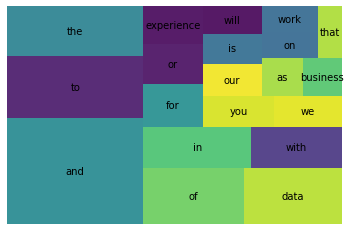

In [24]:
##### Your Code Here #####
import squarify


rank = dtm_df.sum().sort_values(ascending=False)
squarify.plot(sizes=rank.values[:20], label=rank.index[:20], alpha=0.9)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [30]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3)

dtm_tfidf = tfidf.fit_transform(df['description'])
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

dtm_tfidf_df.head()

,000,000 employees,000 yearthe,04,10,10 time,10 years,100,100 000,100 companies,...,years requirements,years technical,years work,years working,yearthe,yes,york,york city,york offices,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [33]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_df)

# Ideal job description in Data Science

job_desc = ['''My ideal job in Data Science would be working for a Major League Baseball team on the west coast. I would love 
to crunch numbers and analyze baseball data for a living. I would want to interpret data and gain an understanding of what it all means. 
Also, I would love to be able to predict future outcomes based on current, obtainable data.
''']

In [34]:
query = tfidf.transform(job_desc)

In [35]:
query

<1x12197 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [36]:
# NN to find closest fit

nn.kneighbors(query.todense())

(array([[1.34544432, 1.35037607, 1.35742489, 1.36432366, 1.3649255 ]]),
 array([[362, 298, 318, 140, 401]]))

In [38]:
# Closest results

# This would be the closest result, correct?

df.loc[362]['description']

'About the Team --------------  At Stitch Fix, our data science team combines artificial intelligence together with expert-human judgment to generate innovative recommendations and insights that help our clients look and feel their best. The Styling Algorithms team is core to our service - we develop capabilities that allow stylists to help our clients find what they love while building meaningful relationships with them. We have a wide latitude to implement state of the art algorithms, contribute to styling product development, and define the future of styling workforce.  About the Role --------------  This role will be focused on developing contextual algorithms and products that are powering how we style our clients. Together with the engineering, UX and styling teams you will drive evolution of our styling process by developing the tools that augment stylists day-to-day tasks. You will have an opportunity to influence the future of combining artificial and human intelligence by dev

In [39]:
# Second closest result

df.loc[298]['description']

'The Data Scientist will perform analysis and modeling for all demand generation and conversion elements including product, placement, price, and promotion in support of the short and long-term goals of the Sales & Marketing and Supply Chain teams.  Job responsibilities include but are not limited to: Perform data mining and predictive analytics to help answer questions to identify key areas within the various function for performance improvement and predict future outcomes and trends. Design, deploy and provide ongoing evaluations of the statistical models and data mining techniques for predictive learning applications. Establish scalable, efficient, automated processes for large-scale data analyses, model development, model validation, and model implementation. Discover patterns and anomalies in data using ad-hoc query/visual discovery. Based on findings, make recommendations to management on possible actions to ensure the desired outcome. Collaborate with internal teams to generate 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 